# Yolo V3 Eye Detection Test

In [5]:
import os
import sys

# Add path to keras-yolo implementation
sys.path.append(os.path.abspath('./keras-yolo3'))

sys.path.insert(0, '../')
from shared import *
import openimages as oi

from yolo import YOLO, detect_video

model = YOLO(model_path='./models/v4-12k-adam1e3-train10/trained_weights_final.h5',
             anchors_path='./keras-yolo3/model_data/yolo_anchors.txt',
             classes_path='./classes-yolo-format.txt',
             score=0.002)

# yolo_model = YOLO(model_path='../../../data/yolov3/yolov3-320.h5',
#                   anchors_path='./keras-yolo3/model_data/yolo_anchors.txt',
#                   classes_path='./keras-yolo3/model_data/coco_classes.txt')


./models/v4-12k-adam1e3-train10/trained_weights_final.h5 model, anchors, and classes loaded.


In [6]:
oi.test_ann_bbox().head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
467,0020ad0a6acaec33,freeform,/m/014sv8,1,0.481013,0.523804,0.248273,0.273495,0,0,0,0,0
468,0020ad0a6acaec33,freeform,/m/014sv8,1,0.561205,0.605829,0.245819,0.277653,0,0,0,0,0
477,0021520c13029a24,freeform,/m/014sv8,1,0.187367,0.263755,0.256735,0.331782,0,0,0,0,0
478,0021520c13029a24,freeform,/m/014sv8,1,0.294578,0.349523,0.274603,0.358585,0,0,0,0,0
479,0021520c13029a24,freeform,/m/014sv8,1,0.376325,0.446012,0.269243,0.353224,0,0,0,0,0


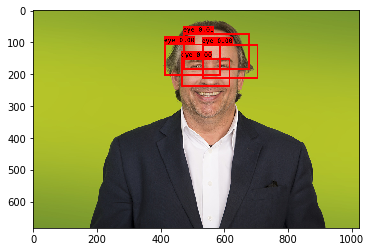

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

sample = Image.open(oi.image_path(oi.test_ann_bbox().iloc[0]))

output_image = model.detect_image(sample)
plt.imshow(output_image)
plt.show()

In [4]:
model.close_session()